In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
img = plt.imread("assets/komodo.jpg")
img.shape

(240, 320, 3)

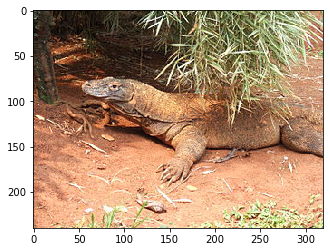

In [3]:
plt.imshow(img)

## Buat tiap pixel jadi data

In [4]:
img = img.reshape(-1, 3)
img

array([[ 50,  62,  42],
       [ 98, 107,  88],
       [101, 105,  90],
       ...,
       [249, 255, 205],
       [207, 213, 169],
       [149, 143, 111]], dtype=uint8)

In [5]:
len(img) # total pixel

76800

In [6]:
len(np.unique(img, axis=0)) # total unique color

49318

## Cluster 49318 colors into 8 color palette

In [7]:
kmeans = KMeans(n_clusters=8, random_state=42, n_jobs=-1)
labels = kmeans.fit_predict(img)

In [8]:
labels

array([5, 2, 2, ..., 7, 3, 4], dtype=int32)

In [9]:
palette = kmeans.cluster_centers_.astype(int)
palette

array([[ 45,  29,  17],
       [183, 176, 134],
       [133,  97,  66],
       [245, 192, 151],
       [175, 128,  93],
       [ 88,  62,  39],
       [222, 158, 120],
       [243, 234, 195]])

In [10]:
quantized_img = palette[labels].reshape(240, 320, 3)
quantized_img

array([[[ 88,  62,  39],
        [133,  97,  66],
        [133,  97,  66],
        ...,
        [175, 128,  93],
        [245, 192, 151],
        [183, 176, 134]],

       [[133,  97,  66],
        [133,  97,  66],
        [133,  97,  66],
        ...,
        [175, 128,  93],
        [175, 128,  93],
        [243, 234, 195]],

       [[133,  97,  66],
        [ 45,  29,  17],
        [ 45,  29,  17],
        ...,
        [175, 128,  93],
        [133,  97,  66],
        [183, 176, 134]],

       ...,

       [[175, 128,  93],
        [175, 128,  93],
        [133,  97,  66],
        ...,
        [243, 234, 195],
        [243, 234, 195],
        [243, 234, 195]],

       [[175, 128,  93],
        [222, 158, 120],
        [175, 128,  93],
        ...,
        [243, 234, 195],
        [243, 234, 195],
        [175, 128,  93]],

       [[222, 158, 120],
        [222, 158, 120],
        [175, 128,  93],
        ...,
        [243, 234, 195],
        [245, 192, 151],
        [175, 128,  93]]

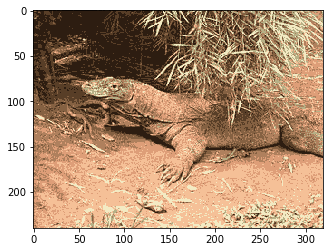

In [11]:
plt.imshow(quantized_img)

In [13]:
def quantize(img, n_palette):
    n_unique = len(np.unique(img.reshape(-1, 3), axis=0))
    
    kmeans = KMeans(n_clusters=n_palette, random_state=42, n_jobs=-1)
    labels = kmeans.fit_predict(img.reshape(-1, 3))
    pallete = kmeans.cluster_centers_.astype(int)
    quantized_img = pallete[labels].reshape(*img.shape)
    
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.imshow(img)
    plt.title(f"Original Image [{n_unique} colors]")
    plt.xticks([]); plt.yticks([])
    
    plt.subplot(122)
    plt.imshow(quantized_img)
    plt.title(f"Quantized Image [{n_palette} colors]")
    plt.xticks([]); plt.yticks([])

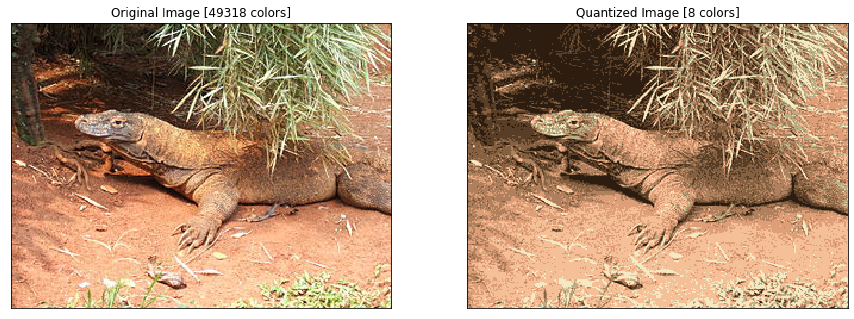

In [14]:
img = plt.imread("assets/komodo.jpg")
quantize(img, 8)

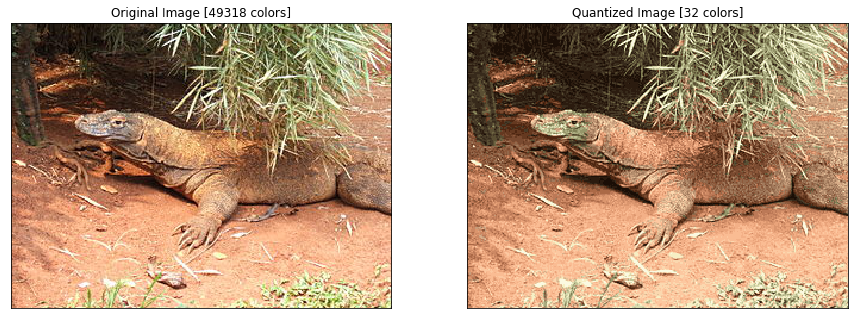

In [15]:
img = plt.imread("assets/komodo.jpg")
quantize(img, 32)

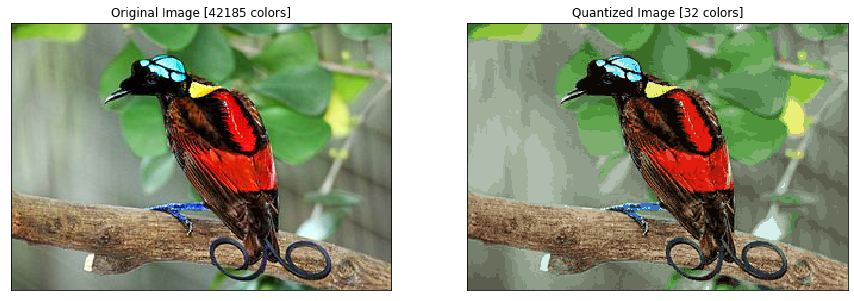

In [16]:
img = plt.imread("assets/cendrawasih_botak.jpg")
quantize(img, 32)

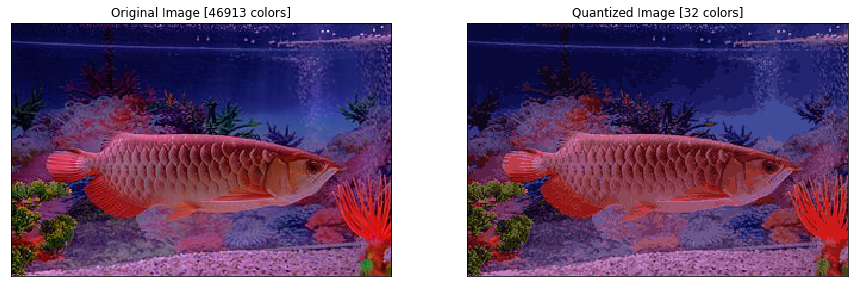

In [17]:
img = plt.imread("assets/arwana_merah.jpg")
quantize(img, 32)

Note: Idea ini dapat digunakan untuk hal lainnya seperti market segmentation. Untuk lebih lanjut, kita akan masuk ke dimensionality reduction, bidang unsupervised learning yang banyak manfaatnya.

Here is the example for customer segmentation<br>
https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis

# Compression Math (Opsional)

Original Image
- 100x100x3 RGB
- `(100*100)*(3*8bit) = 240.000 bit`

Compressed Image (32 palette)
- 100x100 label + 32x3 RGB
- `(100*100*4bit) + (32*3*8bit) = 40.768 bit`